# Cargamos todos los paquetes necesarios 

In [2]:
using Pkg
using CSV
using DataFrames
using BenchmarkTools
using DecisionTree
using MLBase
using ScikitLearn
using Plots
using Statistics

# Cargamos las metricas que vamos a utilizar

In [3]:
@sk_import metrics: accuracy_score
@sk_import metrics: precision_score

PyObject <function precision_score at 0x00000293BDCB5F30>

In [4]:
# Pkg.add("DecisionTree")

# Traemos los splits que creamos en el primer notebook

In [5]:
x_train_df = CSV.read("x_train.csv", DataFrame, normalizenames = true)
y_train_df = CSV.read("y_train.csv", DataFrame, normalizenames = true)
x_test_df = CSV.read("x_test.csv", DataFrame, normalizenames = true)
y_test_df = CSV.read("y_test.csv", DataFrame, normalizenames = true);

In [6]:
x_train = Matrix(x_train_df)
x_test = Matrix(x_test_df)
y_train = vec(Array(y_train_df))
y_test = vec(Array(y_test_df));

# Le preguntamos a Julia como funciona el paquete de los modelos


In [7]:
? DecisionTree

search: DecisionTree DecisionTreeRegressor DecisionTreeClassifier



No docstring found for module `DecisionTree`.

# Exported names

`AdaBoostStumpClassifier`, `DecisionTreeClassifier`, `DecisionTreeRegressor`, `Ensemble`, `InfoLeaf`, `InfoNode`, `Leaf`, `Node`, `RandomForestClassifier`, `RandomForestRegressor`, `Root`, `apply_adaboost_stumps`, `apply_adaboost_stumps_proba`, `apply_forest`, `apply_forest_proba`, `apply_tree`, `apply_tree_proba`, `build_adaboost_stumps`, `build_forest`, `build_stump`, `build_tree`, `depth`, `fit!`, `get_classes`, `impurity_importance`, `load_data`, `nfoldCV_forest`, `nfoldCV_stumps`, `nfoldCV_tree`, `permutation_importance`, `predict`, `predict_proba`, `print_tree`, `prune_tree`, `split_importance`, `wrap`

# Displaying contents of readme found at `C:\Users\LUCAS\.julia\packages\DecisionTree\0Dw1P\README.md`

# DecisionTree.jl

[![CI](https://github.com/JuliaAI/DecisionTree.jl/workflows/CI/badge.svg)](https://github.com/JuliaAI/DecisionTree.jl/actions?query=workflow%3ACI) [![Codecov](https://codecov.io/gh/JuliaAI/DecisionTree.jl/branch/master/graph/badge.svg)](https://codecov.io/gh/JuliaAI/DecisionTree.jl) [![Docs Stable](https://img.shields.io/badge/docs-stable-blue.svg)](https://juliahub.com/docs/DecisionTree/pEDeB/0.10.11/) [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7359268.svg)](https://doi.org/10.5281/zenodo.7359268)

Julia implementation of Decision Tree (CART) and Random Forest algorithms

Created and developed by Ben Sadeghi (@bensadeghi). Now maintained by the [JuliaAI](https://github.com/JuliaAI) organization.

Available via:

  * [AutoMLPipeline.jl](https://github.com/IBM/AutoMLPipeline.jl) - create complex ML pipeline structures using simple expressions
  * [CombineML.jl](https://github.com/ppalmes/CombineML.jl) - a heterogeneous ensemble learning package
  * [MLJ.jl](https://alan-turing-institute.github.io/MLJ.jl/dev/) - a machine learning framework for Julia
  * [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl) - Julia implementation of the scikit-learn API

## Classification

  * pre-pruning (max depth, min leaf size)
  * post-pruning (pessimistic pruning)
  * multi-threaded bagging (random forests)
  * adaptive boosting (decision stumps), using [SAMME](https://www.intlpress.com/site/pub/pages/journals/items/sii/content/vols/0002/0003/a008/)
  * cross validation (n-fold)
  * support for ordered features (encoded as `Real`s or `String`s)

## Regression

  * pre-pruning (max depth, min leaf size)
  * multi-threaded bagging (random forests)
  * cross validation (n-fold)
  * support for numerical features

**Note that regression is implied if labels/targets are of type Array{Float}**

## Installation

You can install DecisionTree.jl using Julia's package manager

```julia
Pkg.add("DecisionTree")
```

## ScikitLearn.jl API

DecisionTree.jl supports the [ScikitLearn.jl](https://github.com/cstjean/ScikitLearn.jl) interface and algorithms (cross-validation, hyperparameter tuning, pipelines, etc.)

Available models: `DecisionTreeClassifier, DecisionTreeRegressor, RandomForestClassifier, RandomForestRegressor, AdaBoostStumpClassifier`. See each model's help (eg. `?DecisionTreeRegressor` at the REPL) for more information

### Classification Example

Load DecisionTree package

```julia
using DecisionTree
```

Separate Fisher's Iris dataset features and labels

```julia
features, labels = load_data("iris")    # also see "adult" and "digits" datasets

# the data loaded are of type Array{Any}
# cast them to concrete types for better performance
features = float.(features)
labels   = string.(labels)
```

Pruned Tree Classifier

```julia
# train depth-truncated classifier
model = DecisionTreeClassifier(max_depth=2)
fit!(model, features, labels)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
# apply learned model
predict(model, [5.9,3.0,5.1,1.9])
# get the probability of each label
predict_proba(model, [5.9,3.0,5.1,1.9])
println(get_classes(model)) # returns the ordering of the columns in predict_proba's output
# run n-fold cross validation over 3 CV folds
# See ScikitLearn.jl for installation instructions
using ScikitLearn.CrossValidation: cross_val_score
accuracy = cross_val_score(model, features, labels, cv=3)
```

Also, have a look at these [classification](https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Classifier_Comparison_Julia.ipynb) and [regression](https://github.com/cstjean/ScikitLearn.jl/blob/master/examples/Decision_Tree_Regression_Julia.ipynb) notebooks.

## Native API

### Classification Example

Decision Tree Classifier

```julia
# train full-tree classifier
model = build_tree(labels, features)
# prune tree: merge leaves having >= 90% combined purity (default: 100%)
model = prune_tree(model, 0.9)
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)
# apply learned model
apply_tree(model, [5.9,3.0,5.1,1.9])
# apply model to all the sames
preds = apply_tree(model, features)
# generate confusion matrix, along with accuracy and kappa scores
DecisionTree.confusion_matrix(labels, preds)
# get the probability of each label
apply_tree_proba(model, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
# run 3-fold cross validation of pruned tree,
n_folds=3
accuracy = nfoldCV_tree(labels, features, n_folds)

# set of classification parameters and respective default values
# pruning_purity: purity threshold used for post-pruning (default: 1.0, no pruning)
# max_depth: maximum depth of the decision tree (default: -1, no maximum)
# min_samples_leaf: the minimum number of samples each leaf needs to have (default: 1)
# min_samples_split: the minimum number of samples in needed for a split (default: 2)
# min_purity_increase: minimum purity needed for a split (default: 0.0)
# n_subfeatures: number of features to select at random (default: 0, keep all)
# keyword rng: the random number generator or seed to use (default Random.GLOBAL_RNG)
n_subfeatures=0; max_depth=-1; min_samples_leaf=1; min_samples_split=2
min_purity_increase=0.0; pruning_purity = 1.0; seed=3

model    =   build_tree(labels, features,
                        n_subfeatures,
                        max_depth,
                        min_samples_leaf,
                        min_samples_split,
                        min_purity_increase;
                        rng = seed)

accuracy = nfoldCV_tree(labels, features,
                        n_folds,
                        pruning_purity,
                        max_depth,
                        min_samples_leaf,
                        min_samples_split,
                        min_purity_increase;
                        verbose = true,
                        rng = seed)
```

Random Forest Classifier

```julia
# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree, and a maximum tree depth of 6
model = build_forest(labels, features, 2, 10, 0.5, 6)
# apply learned model
apply_forest(model, [5.9,3.0,5.1,1.9])
# get the probability of each label
apply_forest_proba(model, [5.9,3.0,5.1,1.9], ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
# add 7 more trees
model = build_forest(model, labels, features, 2, 7, 0.5, 6)
# run 3-fold cross validation for forests, using 2 random features per split
n_folds=3; n_subfeatures=2
accuracy = nfoldCV_forest(labels, features, n_folds, n_subfeatures)

# set of classification parameters and respective default values
# n_subfeatures: number of features to consider at random per split (default: -1, sqrt(# features))
# n_trees: number of trees to train (default: 10)
# partial_sampling: fraction of samples to train each tree on (default: 0.7)
# max_depth: maximum depth of the decision trees (default: no maximum)
# min_samples_leaf: the minimum number of samples each leaf needs to have (default: 5)
# min_samples_split: the minimum number of samples in needed for a split (default: 2)
# min_purity_increase: minimum purity needed for a split (default: 0.0)
# keyword rng: the random number generator or seed to use (default Random.GLOBAL_RNG)
#              multi-threaded forests must be seeded with an `Int`
n_subfeatures=-1; n_trees=10; partial_sampling=0.7; max_depth=-1
min_samples_leaf=5; min_samples_split=2; min_purity_increase=0.0; seed=3

model    =   build_forest(labels, features,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          rng = seed)

accuracy = nfoldCV_forest(labels, features,
                          n_folds,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          verbose = true,
                          rng = seed)
```

Adaptive-Boosted Decision Stumps Classifier

```julia

# train adaptive-boosted stumps, using 7 iterations

model, coeffs = build*adaboost*stumps(labels, features, 7);

# apply learned model

apply*adaboost*stumps(model, coeffs, [5.9,3.0,5.1,1.9])

# get the probability of each label

[output truncated to first 200 lines]


In [8]:
? DecisionTreeClassifier

search: DecisionTreeClassifier



```
DecisionTreeClassifier(; pruning_purity_threshold=0.0,
                       max_depth::Int=-1,
                       min_samples_leaf::Int=1,
                       min_samples_split::Int=2,
                       min_purity_increase::Float=0.0,
                       n_subfeatures::Int=0,
                       rng=Random.GLOBAL_RNG,
                       impurity_importance::Bool=true)
```

Decision tree classifier. See [DecisionTree.jl's documentation](https://github.com/bensadeghi/DecisionTree.jl)

Hyperparameters:

  * `pruning_purity_threshold`: (post-pruning) merge leaves having `>=thresh` combined purity (default: no pruning)
  * `max_depth`: maximum depth of the decision tree (default: no maximum)
  * `min_samples_leaf`: the minimum number of samples each leaf needs to have (default: 1)
  * `min_samples_split`: the minimum number of samples in needed for a split (default: 2)
  * `min_purity_increase`: minimum purity needed for a split (default: 0.0)
  * `n_subfeatures`: number of features to select at random (default: keep all)
  * `rng`: the random number generator to use. Can be an `Int`, which will be used to seed and create a new random number generator.
  * `impurity_importance`: whether to calculate feature importances using `Mean Decrease in Impurity (MDI)`. See [`DecisionTree.impurity_importance`](@ref)

Implements `fit!`, `predict`, `predict_proba`, `get_classes`


In [9]:
? AdaBoostStumpClassifier 

search: AdaBoostStumpClassifier



```
AdaBoostStumpClassifier(; n_iterations::Int=10,
                        rng=Random.GLOBAL_RNG)
```

Adaboosted decision tree stumps. See [DecisionTree.jl's documentation](https://github.com/bensadeghi/DecisionTree.jl)

Hyperparameters:

  * `n_iterations`: number of iterations of AdaBoost
  * `rng`: the random number generator to use. Can be an `Int`, which will be used to seed and create a new random number generator.

Implements `fit!`, `predict`, `predict_proba`, `get_classes`


In [10]:
? RandomForestClassifier

search: RandomForestClassifier



```
RandomForestClassifier(; n_subfeatures::Int=-1,
                       n_trees::Int=10,
                       partial_sampling::Float=0.7,
                       max_depth::Int=-1,
                       rng=Random.GLOBAL_RNG,
                       impurity_importance::Bool=true)
```

Random forest classification. See [DecisionTree.jl's documentation](https://github.com/bensadeghi/DecisionTree.jl)

Hyperparameters:

  * `n_subfeatures`: number of features to consider at random per split (default: -1, sqrt(# features))
  * `n_trees`: number of trees to train (default: 10)
  * `partial_sampling`: fraction of samples to train each tree on (default: 0.7)
  * `max_depth`: maximum depth of the decision trees (default: no maximum)
  * `min_samples_leaf`: the minimum number of samples each leaf needs to have
  * `min_samples_split`: the minimum number of samples in needed for a split
  * `min_purity_increase`: minimum purity needed for a split
  * `rng`: the random number generator to use. Can be an `Int`, which will be used to seed and create a new random number generator. Multi-threaded forests must be seeded with an `Int`
  * `impurity_importance`: whether to calculate feature importances using `Mean Decrease in Impurity (MDI)`. See [`DecisionTree.impurity_importance`](@ref)

Implements `fit!`, `predict`, `predict_proba`, `get_classes`


# Creamos el modelo RandomForest el cual crea un bosque con la cantidad de arboles indicados

In [11]:
model_rf = @btime RandomForestClassifier(n_subfeatures = 10, n_trees = 10000, partial_sampling = .3, max_depth = 20)

  6.400 ns (1 allocation: 96 bytes)


RandomForestClassifier
n_trees:             10000
n_subfeatures:       10
partial_sampling:    0.3
max_depth:           20
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             nothing
ensemble:            nothing

# Entrenamos el modelo

In [12]:
@benchmark DecisionTree.fit!(model_rf, x_train, y_train)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  3.505 s …    3.802 s  ┊ GC (min … max): 3.40% … 9.66%
 Time  (median):     3.654 s               ┊ GC (median):    6.66%
 Time  (mean ± σ):   3.654 s ± 210.158 ms  ┊ GC (mean ± σ):  6.66% ± 4.43%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.51 s         Histogram: frequency by time          3.8 s <

 Memory estimate: 555.16 MiB, allocs estimate: 3598867.

# Generamos las predicciones para el RandomForest

In [13]:
rf_predict = convert(Array{Int64,1}, DecisionTree.predict(model_rf, x_test));

In [14]:
? errorrate

search: errorrate



No documentation found.

`MLBase.errorrate` is a `Function`.

```
# 1 method for generic function "errorrate" from MLBase:
 [1] errorrate(gt::AbstractVector{<:Integer}, r::AbstractVector{<:Integer})
     @ C:\Users\LUCAS\.julia\packages\MLBase\9EP41\src\perfeval.jl:6
```


# Vemos cual es el margen de error del modelo (cuanto mas cercano a cero mejor)


In [15]:
errorrate(y_test, rf_predict)

0.1348314606741573

# Matriz de confusion RF

In [16]:
? confusmat

search: confusmat



No documentation found.

`MLBase.confusmat` is a `Function`.

```
# 1 method for generic function "confusmat" from MLBase:
 [1] confusmat(k::Integer, gts::AbstractVector{<:Integer}, preds::AbstractVector{<:Integer})
     @ C:\Users\LUCAS\.julia\packages\MLBase\9EP41\src\perfeval.jl:10
```


In [17]:
MLBase.confusmat(2, Array{Int64, 1}(y_test .+ 1), Array{Int64, 1}(rf_predict .+ 1))

2×2 Matrix{Int64}:
 107   8
  16  47

# Medimos con diferentes metricas las predicciones del modelo RF

In [18]:
accuracy_rf = accuracy_score(rf_predict, y_test)

0.8651685393258427

In [19]:
precision_rf = precision_score(rf_predict, y_test)

0.746031746031746

# Creamos el modelo AdaBoostStump el cual consiste en crear un bosque de stumps

In [20]:
model_ada = @btime AdaBoostStumpClassifier( n_iterations = 100, rng = 10, coeffs = [0.3, 0.2, 0.1])

  9.600 μs (14 allocations: 19.70 KiB)


AdaBoostStumpClassifier
n_iterations: 100
classes:      nothing
ensemble:     nothing

# Entrenamos el modelo 

In [21]:
@benchmark DecisionTree.fit!(model_ada, x_train, y_train)

BenchmarkTools.Trial: 228 samples with 1 evaluation.
 Range (min … max):  21.151 ms … 24.279 ms  ┊ GC (min … max): 0.00% … 11.02%
 Time  (median):     21.321 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   21.972 ms ±  1.117 ms  ┊ GC (mean ± σ):  2.98% ±  4.51%

   ██▄                                                         
  █████▅▃▃▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▅▅▆▅▅▄▄▃ ▃
  21.2 ms         Histogram: frequency by time          24 ms <

 Memory estimate: 16.68 MiB, allocs estimate: 75629.

# Generamos las predicciones para AdaBoost

In [22]:
ada_predict = convert(Array{Int64,1}, DecisionTree.predict(model_ada, x_test));

In [23]:
errorrate(y_test, ada_predict)

0.15168539325842698

# Matriz de confusion ADA

In [24]:
MLBase.confusmat(2, Array{Int64, 1}(y_test .+ 1), Array{Int64, 1}(ada_predict .+ 1))

2×2 Matrix{Int64}:
 102  13
  14  49

# Medimos el accuracy y la precision

In [25]:
accuracy_ada = accuracy_score(ada_predict, y_test)

0.848314606741573

In [26]:
precision_ada = precision_score(ada_predict, y_test)

0.7777777777777778

# Creamos el modelo DecisionTree, este modelo es mas simple, es un solo un arbol de decision

In [27]:
tree_model = @btime DecisionTreeClassifier(pruning_purity_threshold = 0.7, max_depth = 25, min_samples_leaf = 10 ,
                       min_samples_split = 15, n_subfeatures = 10, rng= 10, impurity_importance = true)

  9.500 μs (13 allocations: 19.67 KiB)


DecisionTreeClassifier
max_depth:                25
min_samples_leaf:         10
min_samples_split:        15
min_purity_increase:      0.0
pruning_purity_threshold: 0.7
n_subfeatures:            10
classes:                  nothing
root:                     nothing

# Entrenamos, simpre con la funcion fit que DecisionTree nos provee

In [28]:
@benchmark DecisionTree.fit!(tree_model, x_train, y_train)

BenchmarkTools.Trial: 3030 samples with 1 evaluation.
 Range (min … max):  1.595 ms …   6.418 ms  ┊ GC (min … max): 0.00% … 73.63%
 Time  (median):     1.620 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.647 ms ± 320.942 μs  ┊ GC (mean ± σ):  1.33% ±  5.04%

        ▁▄▆█▆▅▂▂▁                                              
  ▂▂▂▃▅▇█████████▇▆▆▅▄▄▅▄▄▄▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▂▂▂▁▂ ▃
  1.6 ms          Histogram: frequency by time        1.72 ms <

 Memory estimate: 322.84 KiB, allocs estimate: 3298.

# Predecimos con el modelo que entrenamos

In [29]:
tree_predict = convert(Array{Int64,1}, DecisionTree.predict(tree_model, x_test));

In [30]:
errorrate(y_test, tree_predict)

0.1404494382022472

# Mostramos la matriz de confusion TreeClassifier, cabe aclarar que se le agrega un 1 por un bug en la funcion cuando hay un 0

In [31]:
MLBase.confusmat(2, Array{Int64, 1}(y_test .+ 1), Array{Int64, 1}(tree_predict .+ 1))

2×2 Matrix{Int64}:
 105  10
  15  48

# Medimos su accuracy y precision

In [32]:
accuracy_tree = accuracy_score(tree_predict, y_test)

0.8595505617977528

In [33]:
precision_tree = precision_score(tree_predict, y_test)

0.7619047619047619

# Usando una funcion que nos brinda DecisionTree imprimimos el TreeClassifier, con AdaBoost y RF no se puede logicamente por que al ser bosques es muy grande

In [34]:
print_tree(tree_model)

Feature 3 < 0.5 ?
├─ Feature 2 < 1.5 ?
    ├─ Feature 4 < 60.5 ?
        ├─ Feature 1 < 404.5 ?
            ├─ Feature 4 < 41.0 ?
                ├─ Feature 1 < 256.5 ?
                    ├─ 0 : 8/14
                    └─ 0 : 10/12
                └─ 0 : 10/11
            └─ Feature 4 < 28.5 ?
                ├─ 1 : 9/11
                └─ Feature 1 < 741.5 ?
                    ├─ Feature 1 < 586.0 ?
                        ├─ 0 : 10/17
                        └─ 1 : 9/13
                    └─ 0 : 9/10
        └─ 0 : 10/10
    └─ Feature 4 < 10.0 ?
        ├─ Feature 5 < 2.5 ?
            ├─ 1 : 12/12
            └─ 0 : 10/10
        └─ 0 : 293/333
└─ Feature 2 < 2.5 ?
    ├─ 1 : 129/137
    └─ Feature 7 < 24.81 ?
        ├─ Feature 8 < 0.5 ?
            ├─ Feature 7 < 15.37 ?
                ├─ Feature 7 < 8.008 ?
                    ├─ 1 : 17/21
                    └─ 0 : 7/11
                └─ 1 : 11/11
            └─ Feature 7 < 17.25 ?
                ├─ Feature 7 < 10.82 ?
 

# Por ultimo graficamos las predicciones de cada modelo para tener una comparacion visual

# Graficamos las predicciones del RandomForest

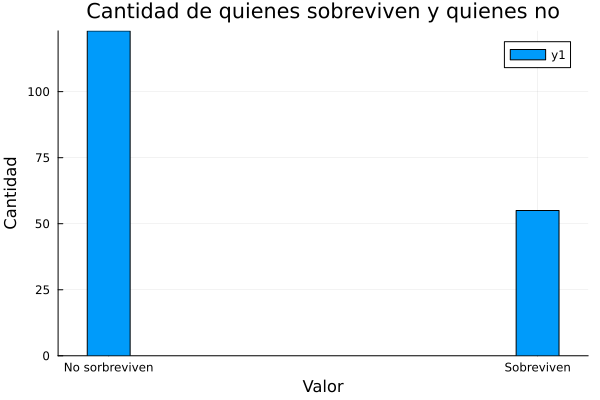

In [35]:
noSurivive = count(x -> x == 0, rf_predict)
survive = count(x -> x == 1, rf_predict)

plot_rf = bar(["No sorbreviven", "Sobreviven"], [noSurivive, survive], title="Cantidad de quienes sobreviven y quienes no", 
                                        xlabel="Valor", ylabel="Cantidad", legend=:topright, bar_width=.1)

# Graficamos las predicciones del AdaBoost

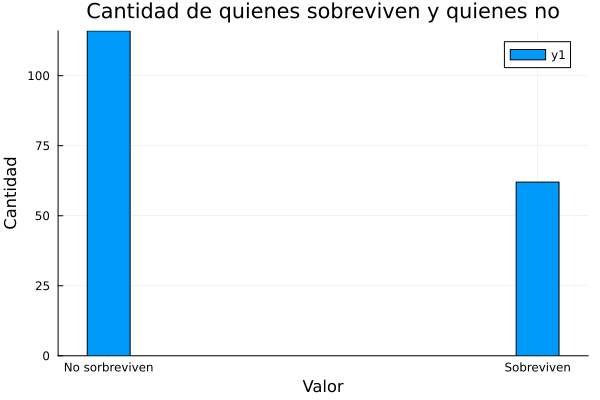

In [36]:
noSurivive = count(x -> x == 0, ada_predict)
survive = count(x -> x == 1, ada_predict)

plot_ada = bar(["No sorbreviven", "Sobreviven"], [noSurivive, survive], title="Cantidad de quienes sobreviven y quienes no", 
                                        xlabel="Valor", ylabel="Cantidad", legend=:topright, bar_width=.1)

# Graficamos las predicciones del TreeClassifier

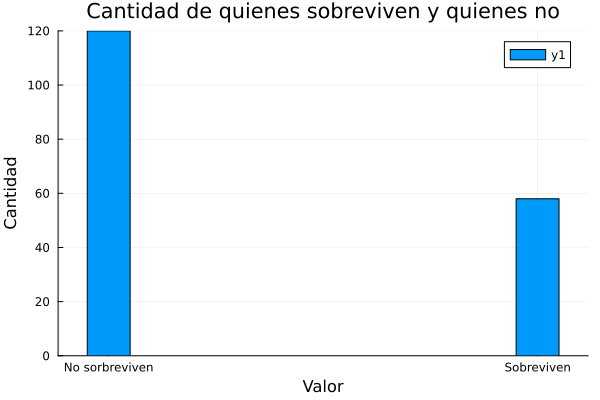

In [37]:
noSurivive = count(x -> x == 0, tree_predict)
survive = count(x -> x == 1, tree_predict)

plot_tree = bar(["No sorbreviven", "Sobreviven"], [noSurivive, survive], title="Cantidad de quienes sobreviven y quienes no", 
                                        xlabel="Valor", ylabel="Cantidad", legend=:topright, bar_width=.1)

# Ahora creamos el modelo XGBoost, el mismo tiene su propia libreria aparte en Julia, es uno de los modelos mas potentes y usados

# El siguiente modelo si bien es de Julia fue tomado del siguiente repositorio https://github.com/dmlc/XGBoost.jl.git

In [38]:
using XGBoost

# Vemos que parametros deberia recibir el modelo para entrenarse correctamente segun Julia

In [39]:
? xgboost()

```
xgboost(data; num_round=10, watchlist=Dict(), kw...)
xgboost(data, ℓ′, ℓ″; kw...)
```

Creates an xgboost gradient booster object on training data `data` and runs `nrounds` of training. This is essentially an alias for constructing a [`Booster`](@ref) with `data` and keyword arguments followed by [`update!`](@ref) for `nrounds`.

`watchlist` is a dict the keys of which are strings giving the name of the data to watch and the values of which are [`DMatrix`](@ref) objects containing the data. It is mandatory to use an OrderedDict when utilising early*stopping*rounds and there is more than 1 element in watchlist to ensure XGBoost uses the  correct and intended dataset to perform early stop.

`early_stopping_rounds` activates early stopping if set to > 0. Validation metric needs to improve at  least once in every k rounds. If `watchlist` is not explicitly provided, it will use the training dataset  to evaluate the stopping criterion. Otherwise, it will use the last data element in `watchlist` and the last metric in `eval_metric` (if more than one). Note that `watchlist` cannot be empty if  `early_stopping_rounds` is enabled.

`maximize` If early*stopping*rounds is set, then this parameter must be set as well. When it is false, it means the smaller the evaluation score the better. When set to true, the larger the evaluation score the better.

All other keyword arguments are passed to [`Booster`](@ref).  With few exceptions these are model training hyper-parameters, see [here](https://xgboost.readthedocs.io/en/stable/parameter.html) for a comprehensive list.

A custom loss function can be provided via its first and second derivatives (`ℓ′` and `ℓ″` respectively). See [`updateone!`](@ref) for more details.

## Examples

```julia
# Example 1: Basic usage of XGBoost
(X, y) = (randn(100,3), randn(100))

b = xgboost((X, y), num_round=10, max_depth=10, η=0.1)

ŷ = predict(b, X)

# Example 2: Using early stopping (using a validation set) with a watchlist
dtrain = DMatrix((randn(100,3), randn(100)))
dvalid = DMatrix((randn(100,3), randn(100)))

watchlist = OrderedDict(["train" => dtrain, "valid" => dvalid])

b = xgboost(dtrain, num_round=10, early_stopping_rounds = 2, watchlist = watchlist, max_depth=10, η=0.1)

# note that ntree_limit in the predict function helps assign the upper bound for iteration_range in the XGBoost API 1.4+
ŷ = predict(b, dvalid, ntree_limit = b.best_iteration)
```


In [40]:
dtrain = DMatrix(x_train, label = y_train);

# Ahora que conocemos los parametros establecemos los valores que cremos adecuados

In [41]:
xgb_model = @time xgboost(dtrain, num_round = 20, early_stopping_rounds = 5, max_depth = 5, η = 0.3)

  0.604108 seconds (845.58 k allocations: 58.946 MiB, 3.04% gc time, 94.23% compilation time)


[ Info: XGBoost: starting training.
[ Info: Will train until there has been no improvement in 5 rounds.
[ Info: [1]	train-rmse:0.41788240407792399
[ Info: [2]	train-rmse:0.37443233496444139
[ Info: [3]	train-rmse:0.34815609787330903
[ Info: [4]	train-rmse:0.32808243773475987
[ Info: [5]	train-rmse:0.31015036301618421
[ Info: [6]	train-rmse:0.29823187747052393
[ Info: [7]	train-rmse:0.29204874665655928
[ Info: [8]	train-rmse:0.28695436092568882
[ Info: [9]	train-rmse:0.28182209651283741
[ Info: [10]	train-rmse:0.27787809447114747
[ Info: [11]	train-rmse:0.27363599013136181
[ Info: [12]	train-rmse:0.26612947820901856
[ Info: [13]	train-rmse:0.26377538273508933
[ Info: [14]	train-rmse:0.26009352865231000
[ Info: [15]	train-rmse:0.25638581622509704
[ Info: [16]	train-rmse:0.24688226165770363
[ Info: [17]	train-rmse:0.24435673648105632
[ Info: [18]	train-rmse:0.24242954244563525
[ Info: [19]	train-rmse:0.24174399644343048
[ Info: [20]	train-rmse:0.23767767691239822
[ Info: Training rounds c

Booster()

# Creamos las predicciones y luego las redondeamos para poder calcular el acurracy ya que queremos una prediccion binaria

In [42]:
xgb_predict =  XGBoost.predict(xgb_model, x_test)

178-element Vector{Float32}:
 0.83594275
 0.3087278
 0.14489658
 0.9720468
 0.972696
 0.07926758
 0.6032498
 0.7199759
 0.24935925
 0.14320494
 0.47512203
 0.7710465
 0.102599114
 ⋮
 0.04812707
 0.4304648
 0.092792556
 0.55007
 0.065891095
 0.4171489
 1.1776047
 0.06850322
 0.18153001
 0.14083013
 0.13352002
 0.12818167

In [43]:
@benchmark XGBoost.predict(xgb_model, x_test)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  183.400 μs …   7.616 ms  ┊ GC (min … max): 0.00% … 36.82%
 Time  (median):     188.100 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   193.308 μs ± 125.890 μs  ┊ GC (mean ± σ):  0.45% ±  0.68%

    ▁██▆▂                                                        
  ▁▄█████▅▅▄▅▆▆▆▅▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  183 μs           Histogram: frequency by time          230 μs <

 Memory estimate: 24.95 KiB, allocs estimate: 51.

In [44]:
xgb_predict_rounded = Array{Int64, 1}(map(val -> round(val), xgb_predict));

In [45]:
errorrate(y_test, xgb_predict_rounded)

0.11797752808988764

# Matriz de confusion XGB

In [46]:
MLBase.confusmat(2, Array{Int64, 1}(y_test .+ 1), Array{Int64, 1}(xgb_predict_rounded .+ 1))

2×2 Matrix{Int64}:
 106   9
  12  51

# Medimos el accuracy y la precision del modelo

In [47]:
accuracy_xgb = accuracy_score(xgb_predict_rounded, y_test) 

0.8820224719101124

In [48]:
precision_xgb = precision_score(xgb_predict_rounded, y_test)

0.8095238095238095

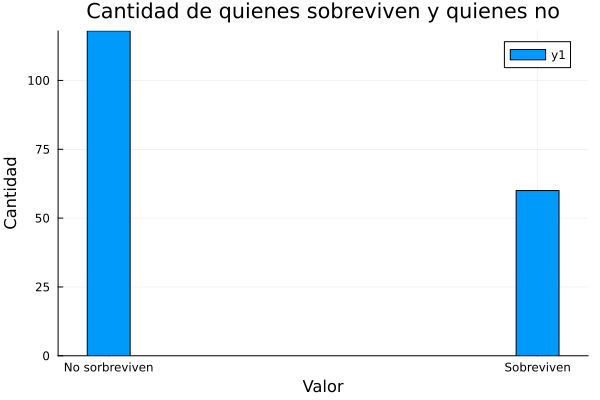

In [49]:
noSurivive = count(x -> x == 0, xgb_predict_rounded)
survive = count(x -> x == 1, xgb_predict_rounded)

plot_xgb = bar(["No sorbreviven", "Sobreviven"], [noSurivive, survive], title="Cantidad de quienes sobreviven y quienes no", 
                                        xlabel="Valor", ylabel="Cantidad", legend=:topright, bar_width=.1)

# Stacking

# Creamos un ensamble muy utilizado, el Stacking, el cual a partir de los modelos propocionados genera predicciones con cada uno y luego usando un meta-modelo, en este caso LogisticRegression, predice a partir de las predicciones generadas por los otros modelos, luego la prediccion final es la de este meta-modelo

In [50]:
using ScikitLearn: fit!, @sk_import, predict as skpredict
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

# Para ser mas ordenados creamos funciones para predecir con los modelos

In [51]:
function predict_rf(model, test_features)
    return DecisionTree.predict(model, test_features)
end

function predict_ada(model, test_features)
    return DecisionTree.predict(model, test_features)
end

function predict_xgb(model, test_features)
    xgb_predict = XGBoost.predict(model, test_features)
    xgb_predict_rounded = Array{Int64, 1}(map(val -> round(val), xgb_predict));
    return xgb_predict_rounded
end


predict_xgb (generic function with 1 method)

# Definimos los modelos que le pasamos al Stacking, estos son los que creamos anteriormente

In [52]:
models = [
    (model_rf, predict_rf),
    (model_ada, predict_ada),
    (xgb_model, predict_xgb)
]

3-element Vector{Tuple{Any, Function}}:
 (RandomForestClassifier
n_trees:             10000
n_subfeatures:       10
partial_sampling:    0.3
max_depth:           20
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             [0, 1]
ensemble:            Ensemble of Decision Trees
Trees:      10000
Avg Leaves: 40.2151
Avg Depth:  12.8494, predict_rf)
 (AdaBoostStumpClassifier
n_iterations: 100
classes:      [0, 1]
ensemble:     Ensemble of Decision Trees
Trees:      100
Avg Leaves: 2.0
Avg Depth:  1.0, predict_ada)
 (Booster(), predict_xgb)

In [53]:
train_predictions = zeros(Int, size(x_train, 1), length(models))

for (i, (model, predict_fn)) in enumerate(models)
    pred = predict_fn(model, x_train)
    train_predictions[:, i] = convert(Vector{Int}, round.(pred)) 
end

# Creamos el meta-modelo

In [54]:
meta_model = LogisticRegression()
fit!(meta_model, train_predictions, y_train)

PyObject LogisticRegression()

# Recorremos la lista de modelos haciendo predecir a cada uno y luego se generan a partir del meta-modelo las predicciones finales

In [55]:
function predict_stacking(models, meta_model, test_features)
    n_samples = size(test_features, 1)
    n_models = length(models)
    base_predictions = zeros(Int, n_samples, n_models)
    
    for (i, (model, predict_fn)) in enumerate(models)
        pred = predict_fn(model, test_features)
        base_predictions[:, i] = convert(Vector{Int}, round.(pred)) 
    end
    
    final_predictions = ScikitLearn.predict(meta_model, base_predictions)
    return final_predictions
end

predict_stacking (generic function with 1 method)

In [56]:
predict_stk = predict_stacking(models, meta_model, x_test);

# Medimos las score y graficamos

In [57]:
accuracy_stk = accuracy_score(y_test, predict_stk)

0.8820224719101124

In [58]:
precision_stk = precision_score(y_test, predict_stk)

0.85

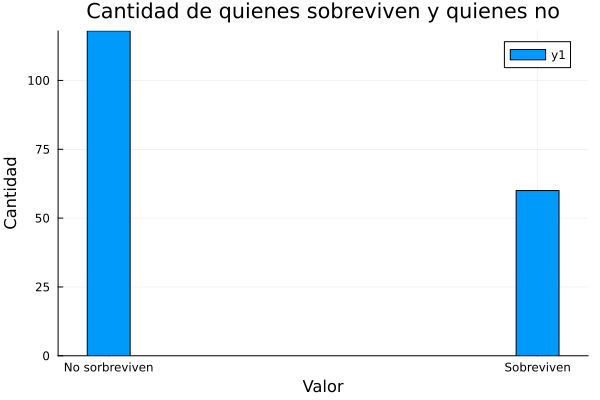

In [59]:
noSurivive = count(x -> x == 0, predict_stk)
survive = count(x -> x == 1, predict_stk)

plot_stk = bar(["No sorbreviven", "Sobreviven"], [noSurivive, survive], title="Cantidad de quienes sobreviven y quienes no", 
                                        xlabel="Valor", ylabel="Cantidad", legend=:topright, bar_width=.1)